In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats, integrate
from string import ascii_letters

In [2]:
data = pd.read_csv(r'brooklyn_sales_map.csv')

/Users/byronleung/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (40,41,43,45,46,47,86) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390883 entries, 0 to 390882
Columns: 111 entries, Unnamed: 0 to SHAPE_Area
dtypes: float64(64), int64(11), object(36)
memory usage: 331.0+ MB


In [4]:
data.describe()

,Unnamed: 0,borough,block,lot,easement,zip_code,residential_units,commercial_units,total_units,land_sqft,...,XCoord,YCoord,TaxMap,APPBBL,PLUTOMapID,FIRM07_FLA,PFIRM15_FL,MAPPLUTO_F,SHAPE_Leng,SHAPE_Area
count,390883.000000,390883.0,390883.000000,390883.000000,0.0,390883.000000,390883.000000,390883.000000,390883.000000,3.908830e+05,...,3.037280e+05,303728.000000,303710.000000,3.037280e+05,303728.000000,8653.0,27773.0,303728.000000,303728.000000,3.037280e+05
mean,195442.000000,3.0,4275.651169,272.509986,NaN,11208.429087,2.486138,0.174142,2.673227,2.368464e+03,...,9.921077e+05,175146.073694,31396.728152,1.927884e+08,1.000145,1.0,1.0,0.000244,337.445796,8.645885e+03
std,112838.346973,0.0,2642.765332,484.658837,NaN,361.207836,48.200178,1.653362,48.233343,2.509129e+04,...,7.391759e+04,18390.569903,754.905314,7.409608e+08,0.017021,0.0,0.0,0.036740,329.587401,3.116106e+04
min,1.000000,3.0,1.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000e+00,0.000000,3.000000,0.000000e+00,1.000000,1.0,1.0,0.000000,2.143758,1.007072e-01
25%,97721.500000,3.0,1786.000000,21.000000,NaN,11209.000000,1.000000,0.000000,1.000000,0.000000e+00,...,9.892368e+05,165334.750000,30611.000000,0.000000e+00,1.000000,1.0,1.0,0.000000,238.997798,1.938904e+03
50%,195442.000000,3.0,4305.000000,45.000000,NaN,11219.000000,1.000000,0.000000,1.000000,1.900000e+03,...,9.975955e+05,175906.000000,31506.000000,0.000000e+00,1.000000,1.0,1.0,0.000000,249.411350,2.316886e+03
75%,293162.500000,3.0,6585.000000,94.000000,NaN,11230.000000,2.000000,0.000000,2.000000,2.500000e+03,...,1.005059e+06,187140.000000,32005.000000,0.000000e+00,1.000000,1.0,1.0,0.000000,283.169119,3.478477e+03
max,390883.000000,3.0,8955.000000,9133.000000,NaN,33803.000000,20811.000000,355.000000,20811.000000,7.446955e+06,...,1.024202e+06,208406.000000,32605.000000,3.089321e+09,3.000000,1.0,1.0,7.000000,19861.521019,7.149338e+06


In [5]:
data.head(3)

,Unnamed: 0,borough,neighborhood,building_class_category,tax_class,block,lot,easement,building_class,address,...,EDesigNum,APPBBL,APPDate,PLUTOMapID,FIRM07_FLA,PFIRM15_FL,Version,MAPPLUTO_F,SHAPE_Leng,SHAPE_Area
0,1,3,DOWNTOWN-METROTECH,28 COMMERCIAL CONDOS,4,140,1001,NaN,R5,330 JAY STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,3,DOWNTOWN-FULTON FERRY,29 COMMERCIAL GARAGES,4,54,1,NaN,G7,85 JAY STREET,...,NaN,3.000540e+09,12/06/2002,1.0,NaN,NaN,17V1.1,0.0,1559.889144,140131.577176
2,3,3,BROOKLYN HEIGHTS,21 OFFICE BUILDINGS,4,204,1,NaN,O6,29 COLUMBIA HEIGHTS,...,NaN,0.000000e+00,NaN,1.0,NaN,NaN,17V1.1,0.0,890.718521,34656.447240


### <center>The response variable study shown below.</center>

In [6]:
pd.DataFrame(data['sale_price'].describe()).T
#More than 25% of the data is 0, which is not normal for house prices

,count,mean,std,min,25%,50%,75%,max
sale_price,390883.0,506754.477693,2.353965e+06,0.0,0.0,275000.0,593000.0,499401179.0


In [7]:
spcount = pd.DataFrame(data['sale_price'].value_counts()).reset_index()
spcount.columns = ['sale_price','count']
spcount.sort_values(by='sale_price')
#sales prices count
#obviously ， when housing sale prices equal to zero， that could be outliers.

,sale_price,count
0,0.0,140143
74,1.0,709
1541,2.0,17
1653,3.0,15
1861,4.0,12
...,...,...
18718,240000000.0,1
9907,276947000.0,1
7891,340000000.0,1
6925,345000000.0,1


As table above , from our common knowledge, it innormal to have housing price that less than 100.

So I don’t think it’s of much practical significance to put this kind of label that doesn’t make much sense in the model. After all, we don’t want the housing price in city center less than 100 dollor as the model prediction. 

The idea of filling in missing values is good. However, for useless labels, I don’t think that the filling of missing values will improve the practical application, because the answers have changed quite a lot, and the indicators have lost the strength and reliability of interpretation.

When the amount of data is large enough, I choose to directly delete this kind of data that does not make much sense

The link and screenshot of details of 0 sales prices in user infomation please see below.

https://www1.nyc.gov/assets/finance/downloads/pdf/07pdf/glossary_rsf071607.pdf

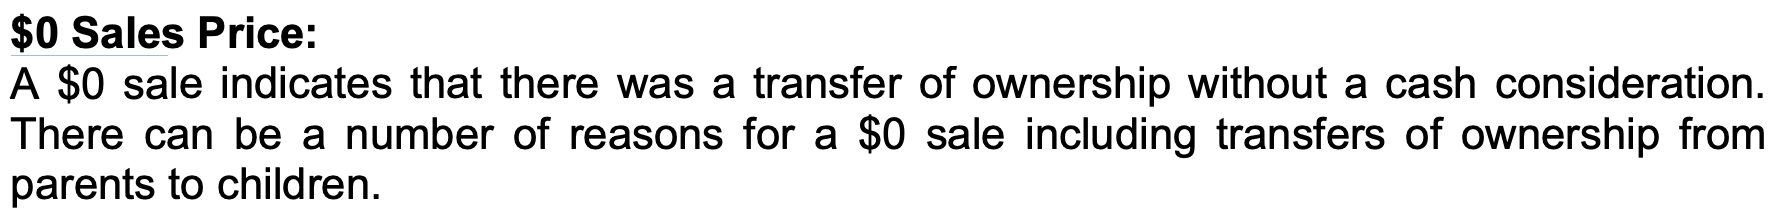

So these data wouldn't help much in practical application when pricing the properties

In [8]:
data.shape

(390883, 111)

In [9]:
data = data.drop(index=data[data['sale_price']<=100.0].index)
data.shape
#further study of this outlier

(246110, 111)

In [10]:
spcount1 = pd.DataFrame(data['sale_price'].value_counts()).reset_index()
spcount1.columns = ['sale_price','count']
spcount1.sort_values(by='sale_price')

,sale_price,count
23310,116.0,1
24060,117.0,1
6189,125.0,2
15024,130.0,1
4616,150.0,3
...,...,...
8708,240000000.0,1
9971,276947000.0,1
24535,340000000.0,1
25163,345000000.0,1


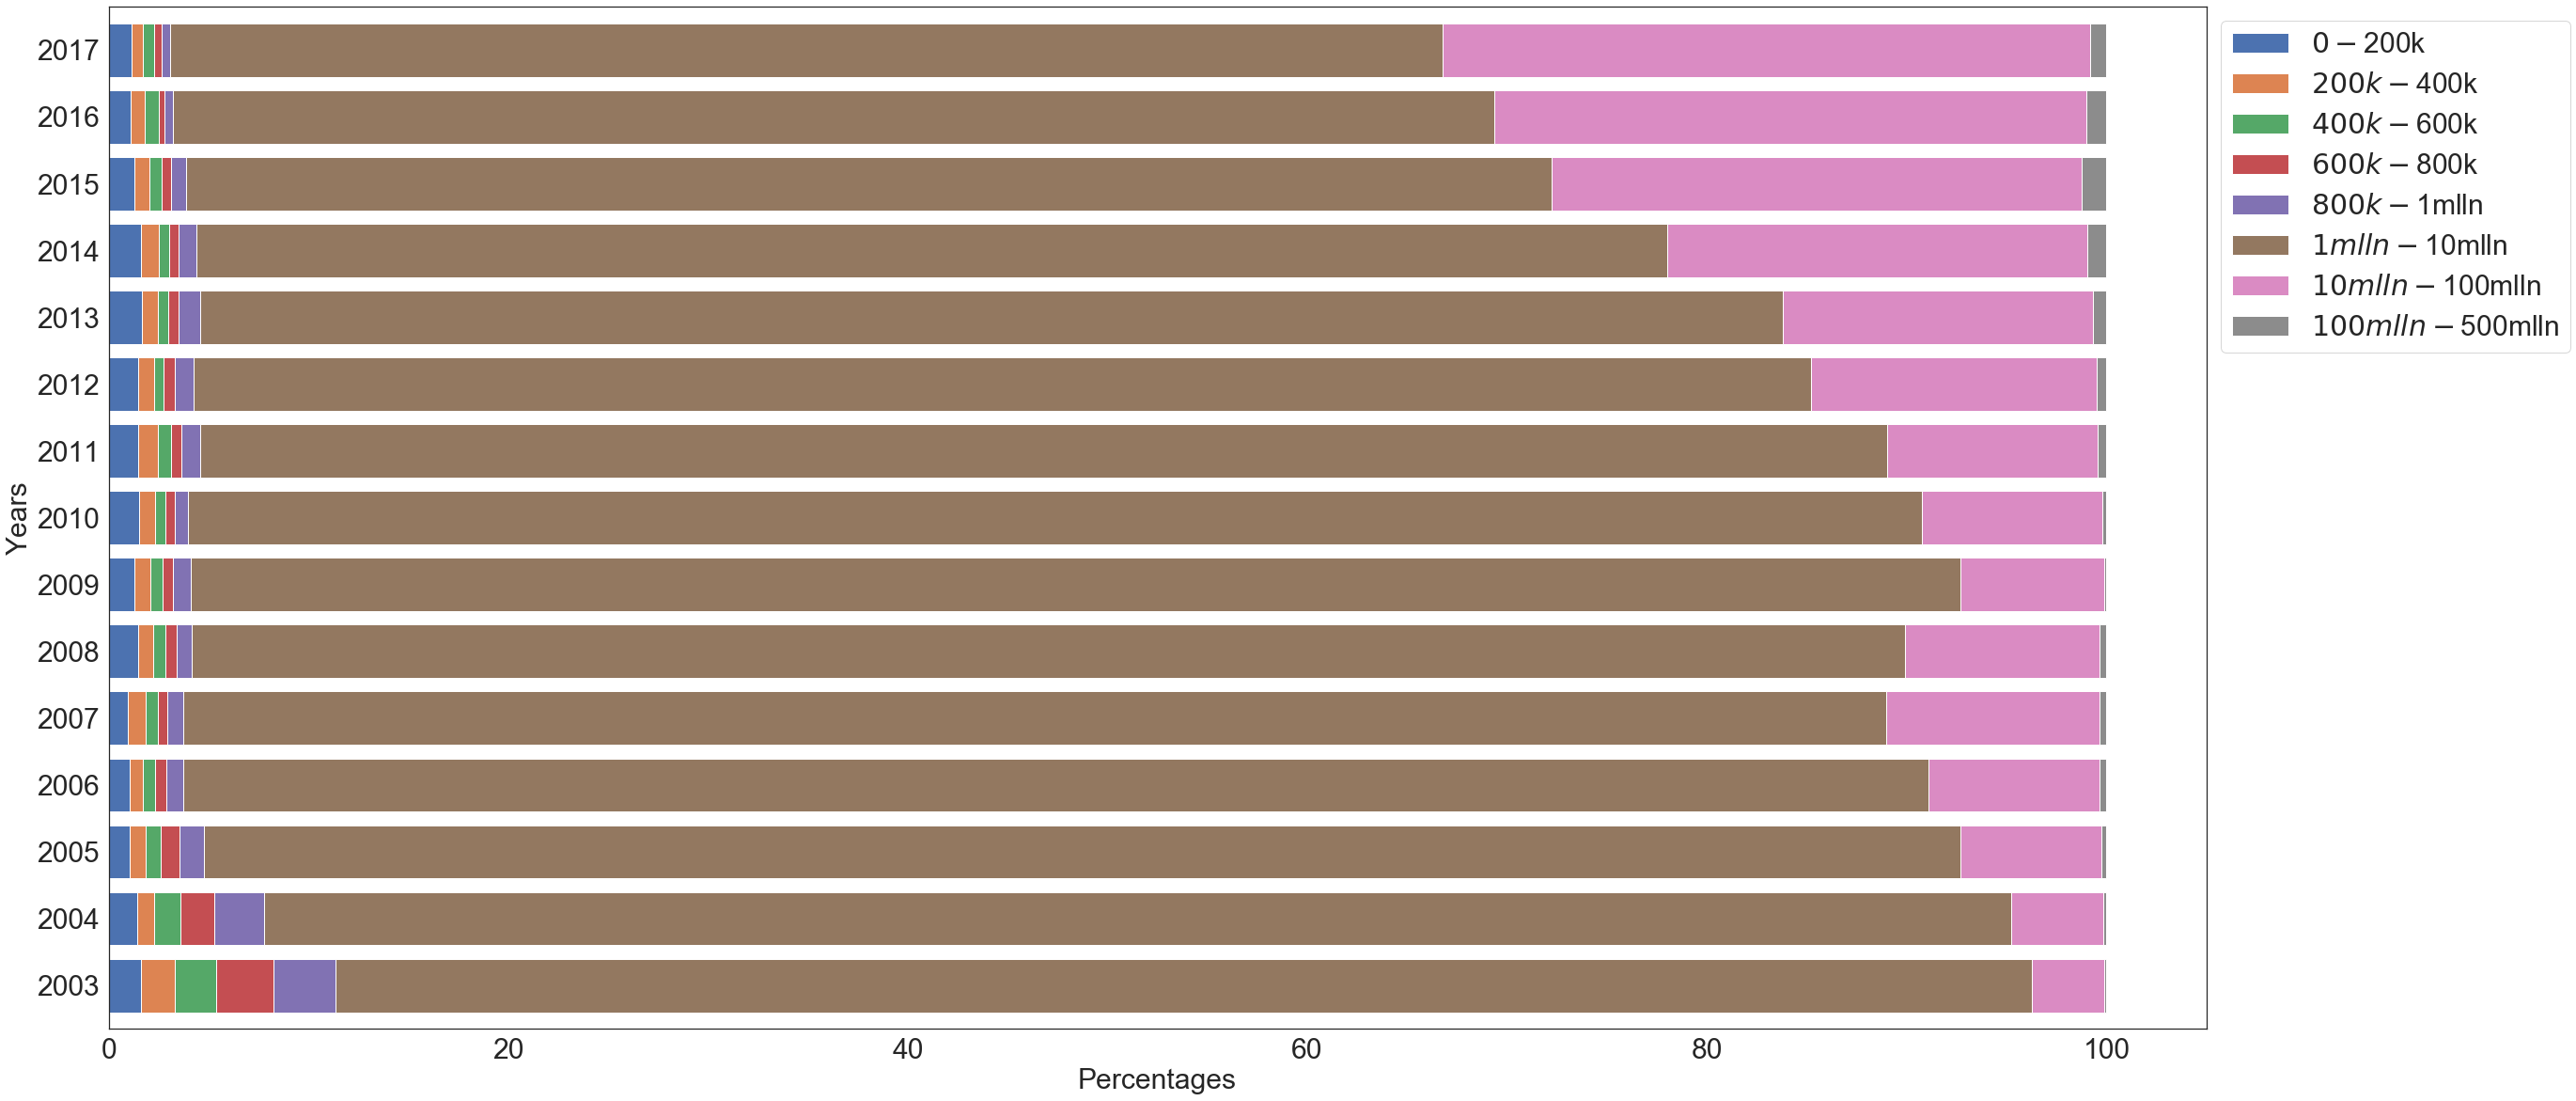

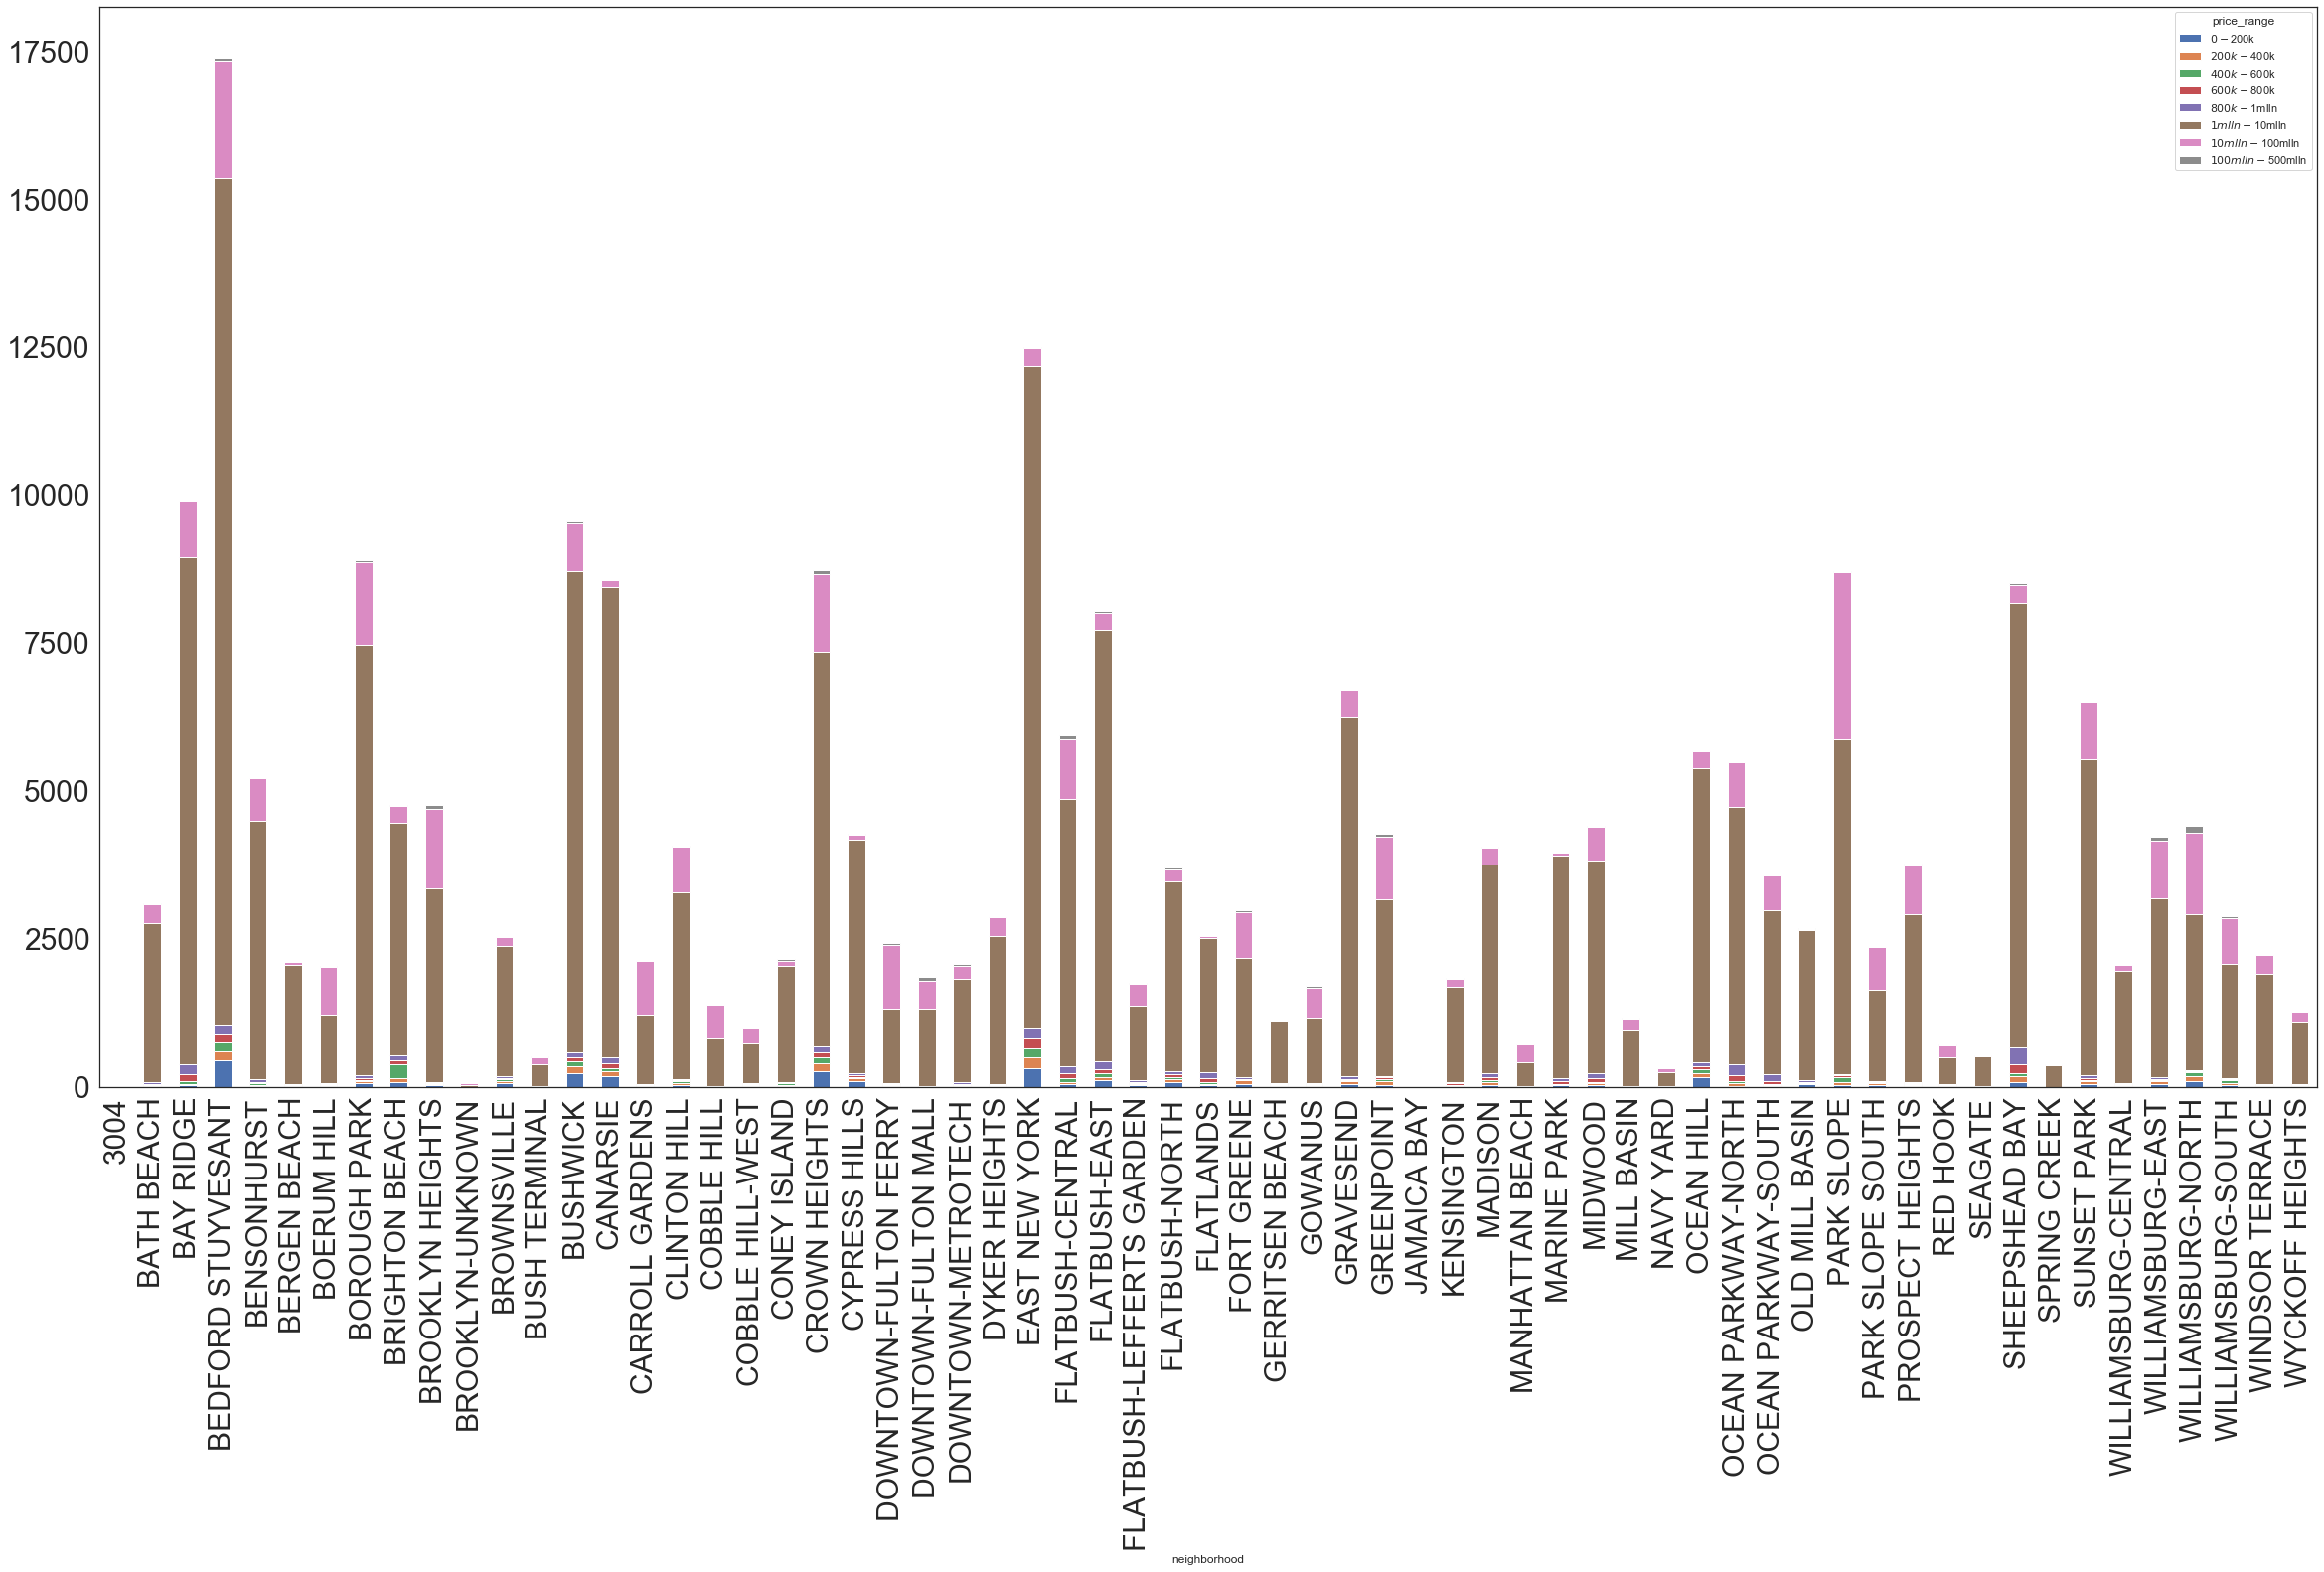

In [74]:
bins=[-100000000,20000,40000,60000,80000,100000,1000000,10000000,500000000]
choices =['$0-$200k','$200k-$400k','$400k-$600k','$600k-$800k','$800k-$1mlln','$1mlln-$10mlln'
          ,'$10mlln-$100mlln','$100mlln-$500mlln']
data['price_range']=pd.cut(data['sale_price'],bins=bins,labels=choices)
def conv(year):
    return data[data['year_of_sale']==year].groupby('price_range').size()
perc_total = [x/sum(x)*100 for x in [conv(2003),conv(2004),conv(2005),conv(2006)
                                     ,conv(2007),conv(2008),conv(2009),conv(2010),conv(2011)
                                     ,conv(2012),conv(2013),conv(2014),conv(2015),conv(2016),conv(2017)]]
year_names = list(range(2003,2018))
housing_df = pd.DataFrame(perc_total, index= year_names)
ax_two = housing_df.plot(kind='barh', stacked=True, width=0.80,fontsize=30)
horiz_offset = 1
vert_offset = 1
ax_two.set_xlabel('Percentages',fontsize=30)
ax_two.set_ylabel('Years',fontsize=30)
ax_two.legend(bbox_to_anchor=(horiz_offset, vert_offset), fontsize=30)
data.groupby(['neighborhood','price_range']).size().unstack().plot.bar(stacked=True,fontsize=30)
horiz_offset = 1
vert_offset = 1
plt.rcParams["figure.figsize"] = [40,20]

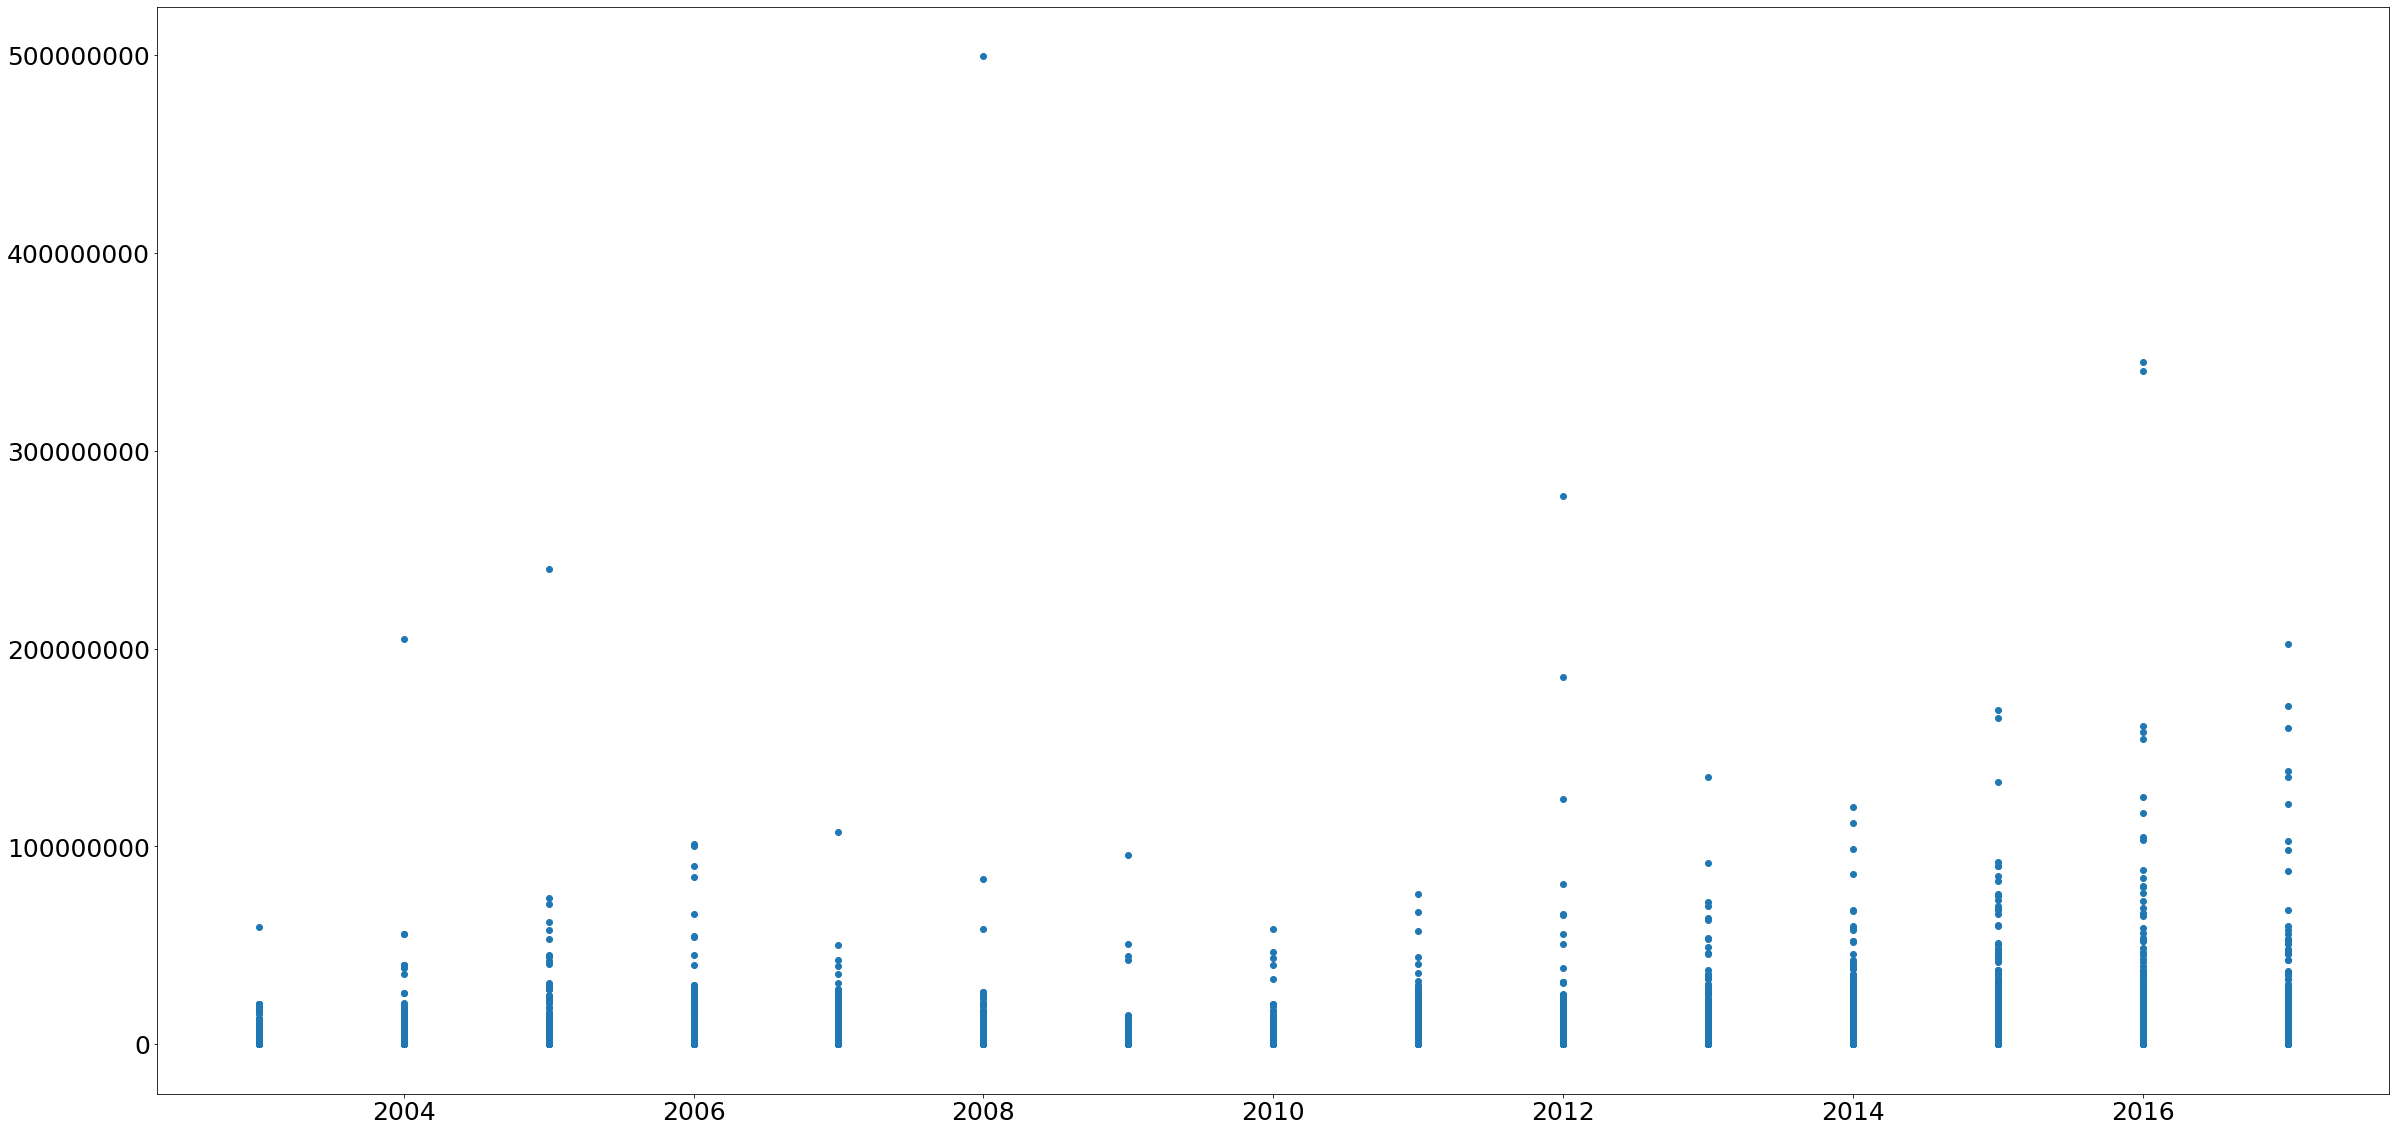

In [12]:
#scatterplot visualisation
plt.scatter(x=data['year_of_sale'],y=data['sale_price'])
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
ax =plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.draw()

From the graphs above, even overall house fluctuated durining financial crisis in 2008 and 2009. The overall trend remains upward slowly.

Over time, the higher the proportion of more expensive housing prices.

### <center>training set and test set split</center>

In [13]:
Y = data['sale_price']
X = data.drop(['sale_price'],axis = 1)
print(X.shape , Y.shape)

(246110, 111) (246110,)


In [14]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.2,random_state=420) 

In [15]:
Xtrain.shape

(196888, 111)

In [16]:
Xtest.shape

(49222, 111)

In [17]:
Ytrain.shape

(196888,)

In [18]:
Ytest.shape

(49222,)

In [19]:
for i in [Xtrain, Xtest, Ytrain, Ytest]:
    i.index = range(i.shape[0])
#restore index

In [20]:
mvalue = pd.DataFrame(data.isna().sum()).T
mvalue
#Some data have many missing values

,Unnamed: 0,borough,neighborhood,building_class_category,tax_class,block,lot,easement,building_class,address,...,APPBBL,APPDate,PLUTOMapID,FIRM07_FLA,PFIRM15_FL,Version,MAPPLUTO_F,SHAPE_Leng,SHAPE_Area,price_range
0,0,0,0,17,3510,0,0,246110,3510,1,...,57198,234737,57198,240703,228491,57198,57198,57198,57198,0


#### <center>miss data study</center>

In [21]:
missing = ((mvalue/data.shape[0]).T)
missing

,0
Unnamed: 0,0.000000
borough,0.000000
neighborhood,0.000000
building_class_category,0.000069
tax_class,0.014262
...,...
Version,0.232408
MAPPLUTO_F,0.232408
SHAPE_Leng,0.232408
SHAPE_Area,0.232408


In [22]:
(missing.sort_values(by=[0],ascending=False)).head(10)
# Many data missing values in the data set have reached more than 95%

,0
easement,1.000000
ZoneDist4,0.999992
SPDist3,0.999984
SPDist2,0.999951
Overlay2,0.999846
Landmark,0.999720
ZoneDist3,0.999415
EDesigNum,0.993178
ZMCode,0.983654
LtdHeight,0.982687


In order to save calculation space, I directly removed the columns with null value accounting for more than 70%

In [23]:
misslist = missing[missing[0]>0.7].index.tolist()
misslist

['easement',
 'apartment_number',
 'ZoneDist2',
 'ZoneDist3',
 'ZoneDist4',
 'Overlay1',
 'Overlay2',
 'SPDist1',
 'SPDist2',
 'SPDist3',
 'LtdHeight',
 'OwnerType',
 'Ext',
 'HistDist',
 'Landmark',
 'ZMCode',
 'EDesigNum',
 'APPDate',
 'FIRM07_FLA',
 'PFIRM15_FL']

In [24]:
Xtrain.shape

(196888, 111)

In [25]:
Xtrain = Xtrain.drop(misslist,axis = 1)
Xtrain.shape

(196888, 91)

#### <center>Remove some unnecessary columns</center>

In [26]:
# Xtrain.columns.tolist()
# the outcomes listed below

['Unnamed: 0',
 'borough',
 'neighborhood',
 'building_class_category',
 'tax_class',
 'block',
 'lot',
 'building_class',
 'address',
 'zip_code',
 'residential_units',
 'commercial_units',
 'total_units',
 'land_sqft',
 'gross_sqft',
 'year_built',
 'tax_class_at_sale',
 'building_class_at_sale',
 'sale_date',
 'year_of_sale',
 'Borough',
 'CD',
 'CT2010',
 'CB2010',
 'SchoolDist',
 'Council',
 'ZipCode',
 'FireComp',
 'PolicePrct',
 'HealthCent',
 'HealthArea',
 'SanitBoro',
 'SanitDistr',
 'SanitSub',
 'Address',
 'ZoneDist1',
 'SplitZone',
 'BldgClass',
 'LandUse',
 'Easements',
 'OwnerName',
 'LotArea',
 'BldgArea',
 'ComArea',
 'ResArea',
 'OfficeArea',
 'RetailArea',
 'GarageArea',
 'StrgeArea',
 'FactryArea',
 'OtherArea',
 'AreaSource',
 'NumBldgs',
 'NumFloors',
 'UnitsRes',
 'UnitsTotal',
 'LotFront',
 'LotDepth',
 'BldgFront',
 'BldgDepth',
 'ProxCode',
 'IrrLotCode',
 'LotType',
 'BsmtCode',
 'AssessLand',
 'AssessTot',
 'ExemptLand',
 'ExemptTot',
 'YearBuilt',
 'YearAlter1',
 'YearAlter2',
 'BuiltFAR',
 'ResidFAR',
 'CommFAR',
 'FacilFAR',
 'BoroCode',
 'BBL',
 'CondoNo',
 'Tract2010',
 'XCoord',
 'YCoord',
 'ZoneMap',
 'Sanborn',
 'TaxMap',
 'APPBBL',
 'PLUTOMapID',
 'Version',
 'MAPPLUTO_F',
 'SHAPE_Leng',
 'SHAPE_Area',
 'price_range']

After read the user infomation carefully, I listed the unnecessary columns and corresponding reasons below.

In [27]:
droplist = ['Unnamed: 0' #no description , the number is the index plus 1 corresponding to the row.
           ,'borough'#because the data is for Brooklyn borough only, there is no need to maintion again
           ,'Borough' #overlap with 'borough'
           ,'Address'#same as 'address'
           ,'BldgClass' #Same as 'building_class'
           ,'YearBuilt' #same as 'year_built'
            ,'BoroCode' #same as 'Borough'
            ,'building_class_category' #same as 'building_class'
            ,'ZipCode' #same as 'zip_code'
            ,'BBL' #a concatenation of the borough code, tax block and tax lot，overlap
            ,'Sanborn' #the Sanborn Map Company map number associated with the tax block and lot.
            ,'MAPPLUTO_F' #only some number like 0,5 and missing value, i didn't find any description about it
            ,'UnitsRes' #same as 'residential_units'
            ,'UnitsTotal' #same as 'total_units'
            ,'year_of_sale' #i have date of sale
            ,'BldgArea' #the total gross area in square feet, same as 'gross_sqft'
            ,'AreaSource' 
        #that is a code indicating the source file that was used to determine the tax lot's
#             TOTAL BUILDING FLOOR AREA (BldgArea)
            ,'ZoneDist1' 
#ZONING DISTRICT 1 represents the zoning district classification occupying the greatest percentage of the tax lot’s area.
            ,'OwnerName'
             ,'ZoneMap', 'TaxMap',
            'SanitSub' #The Subsection of the Sanitation District that services the tax lot.
            ,'Version' # version vumber related to the release of PLUTO.
            ,'SHAPE_Leng', 'SHAPE_Area'#don't know what they are
           ]

In [28]:
Xtrain.shape

(196888, 91)

In [29]:
Xtrain.drop(droplist,axis = 1,inplace = True)
Xtrain.shape

(196888, 66)

In [30]:
Xtrain.corr()

,block,lot,zip_code,residential_units,commercial_units,total_units,land_sqft,gross_sqft,year_built,tax_class_at_sale,...,BuiltFAR,ResidFAR,CommFAR,FacilFAR,CondoNo,Tract2010,XCoord,YCoord,APPBBL,PLUTOMapID
block,1.000000,-0.133164,0.012684,-0.006259,-0.017837,-0.006698,0.025472,-0.012850,0.106074,-0.192529,...,-0.221503,-0.426537,-0.157086,-0.358191,-0.000516,0.144162,0.019353,-0.698518,-0.035144,0.002493
lot,-0.133164,1.000000,-0.024184,-0.014811,-0.041639,-0.015553,-0.085889,-0.104068,-0.372149,0.241313,...,-0.038914,-0.066269,-0.026894,-0.042095,0.214190,0.097892,-0.025802,-0.154772,0.103039,0.042219
zip_code,0.012684,-0.024184,1.000000,-0.000120,0.003848,-0.000031,-0.000232,0.000507,0.076547,-0.023803,...,-0.002182,-0.002602,-0.007138,-0.006009,0.000082,0.003376,0.067628,0.030689,-0.009464,0.000197
residential_units,-0.006259,-0.014811,-0.000120,1.000000,0.006534,0.999744,0.054128,0.159655,0.011548,0.008956,...,0.063262,0.049354,0.006747,0.056779,-0.000736,0.005711,0.010002,0.034429,0.021083,-0.001478
commercial_units,-0.017837,-0.041639,0.003848,0.006534,1.000000,0.029018,0.082068,0.164189,0.027038,0.189028,...,0.039491,0.034418,0.117200,0.051833,-0.000391,-0.013217,-0.000600,0.032029,0.027148,-0.001041
total_units,-0.006698,-0.015553,-0.000031,0.999744,0.029018,1.000000,0.055911,0.163222,0.012087,0.013487,...,0.066935,0.052598,0.019299,0.061799,-0.000772,0.004251,0.009836,0.037539,0.023729,-0.001577
land_sqft,0.025472,-0.085889,-0.000232,0.054128,0.082068,0.055911,1.000000,0.430544,0.027404,0.065474,...,-0.055851,-0.052457,0.045107,-0.019610,0.000691,0.002395,-0.004652,-0.000359,0.060651,-0.001187
gross_sqft,-0.012850,-0.104068,0.000507,0.159655,0.164189,0.163222,0.430544,1.000000,0.072467,0.087832,...,0.076243,0.025386,0.077798,0.054549,0.005288,0.000646,0.007064,0.038547,0.053686,-0.001899
year_built,0.106074,-0.372149,0.076547,0.011548,0.027038,0.012087,0.027404,0.072467,1.000000,-0.206833,...,0.095172,0.009394,-0.058376,-0.024158,0.001119,0.021559,0.193372,0.030758,-0.028995,-0.018934
tax_class_at_sale,-0.192529,0.241313,-0.023803,0.008956,0.189028,0.013487,0.065474,0.087832,-0.206833,1.000000,...,0.326096,0.204312,0.233161,0.233276,0.002212,-0.039037,-0.075625,0.069821,0.024598,0.002827


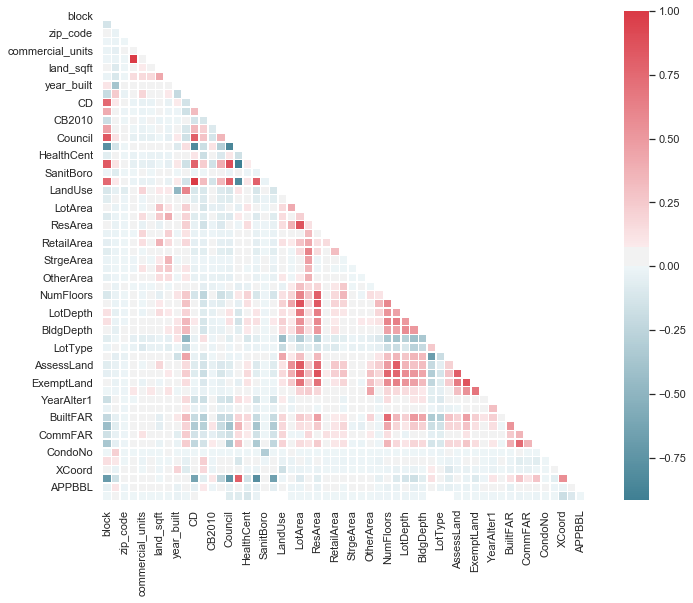

In [31]:
sns.set(style="white")
corr = Xtrain.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask,  cmap=cmap, vmax=1 , linewidths=.5)

As shown in the figure above, the correlation coefficients between most of the variables are 0 approximately, and a small number of variables have a relatively stronger linear relationship.

For further study with housing sale price, I sorted the correlation coefficient with 'sale_price' and the other features in decending order.

In [32]:
pd.DataFrame(data.corr()['sale_price']).sort_values(by='sale_price',ascending = False).head(10)

,sale_price
sale_price,1.000000
gross_sqft,0.378224
OfficeArea,0.328355
ComArea,0.324713
RetailArea,0.273142
land_sqft,0.249012
FactryArea,0.180400
commercial_units,0.158909
CommFAR,0.130832
tax_class_at_sale,0.126977


In [33]:
(pd.DataFrame(data.corr()['sale_price']).dropna(axis = 0)).sort_values(by='sale_price',ascending = True).head(10).T

,Unnamed: 0,HealthArea,Council,BBL,TaxMap,block,CD,SanitDistr,SchoolDist,LotType
sale_price,-0.121677,-0.079901,-0.07714,-0.07492,-0.073241,-0.070264,-0.069838,-0.069779,-0.069265,-0.066214


Now use random forest to sort feature importtances, leave more important features and deal with less importat features by feature engineering.

In [34]:
(pd.DataFrame(data.corr()['sale_price']).sort_values(by='sale_price',ascending = False).head(10).T).columns.tolist()

['sale_price',
 'gross_sqft',
 'OfficeArea',
 'ComArea',
 'RetailArea',
 'land_sqft',
 'FactryArea',
 'commercial_units',
 'CommFAR',
 'tax_class_at_sale']

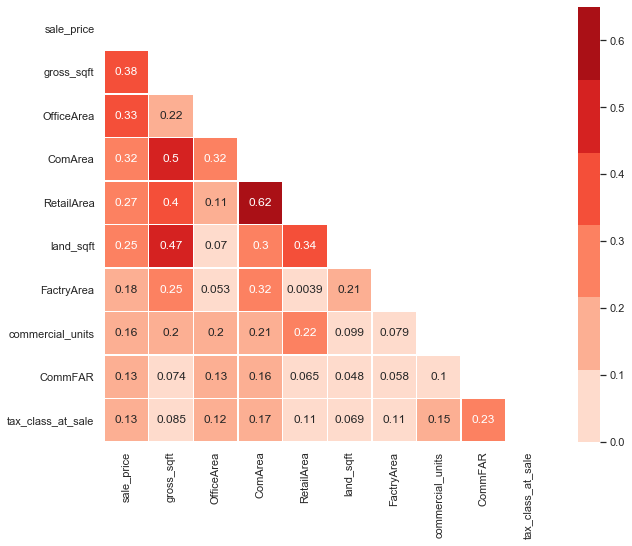

In [35]:
sns.set(style="white")
corr = data[['sale_price',
 'gross_sqft',
 'OfficeArea',
 'ComArea',
 'RetailArea',
 'land_sqft',
 'FactryArea',
 'commercial_units',
 'CommFAR',
 'tax_class_at_sale']].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(10,8))
# cmap = sns.diverging_palette(220, 10, sep=10)
cmap = sns.color_palette("Reds")
sns.heatmap(corr, mask=mask,  
            cmap=cmap, 
            vmax=.65 ,vmin=0, linewidths=.5, annot=True)

When processing data, it is still necessary to note that some variables such as RetailArea and ComArea still have strong multicollinearity

#### <center>Processing missing data</center>

In order to exert as much influence as possible on the data, continuous variables are filled with the mean value of the training set, while differentiated variables are filled with the most frequently occurring data in the training set

In [36]:
typelist = pd.DataFrame(Xtrain.dtypes)
typelist.loc[:,0].value_counts()

float64     48
object       9
int64        8
category     1
Name: 0, dtype: int64

In [37]:
(Xtrain.loc[:,typelist[typelist[0] == 'int64'].index.tolist()].isnull()).sum()
#The data of type'int64' has no missing values

block                0
lot                  0
zip_code             0
residential_units    0
commercial_units     0
total_units          0
year_built           0
tax_class_at_sale    0
dtype: int64

In [38]:
(Xtest.loc[:,typelist[typelist[0] == 'int64'].index.tolist()].isnull()).sum()
#The data of type'int64' has no missing values

block                0
lot                  0
zip_code             0
residential_units    0
commercial_units     0
total_units          0
year_built           0
tax_class_at_sale    0
dtype: int64

In [39]:
floatlist = typelist[typelist[0] == 'float64'].index.tolist()
(Xtrain.loc[:,floatlist].isnull()).mean()
#calculate the "missing ratio"

land_sqft     0.000000
gross_sqft    0.000000
CD            0.231969
CT2010        0.232112
CB2010        0.232919
SchoolDist    0.232035
Council       0.231969
PolicePrct    0.231969
HealthCent    0.231969
HealthArea    0.231969
SanitBoro     0.232330
SanitDistr    0.232330
LandUse       0.233493
Easements     0.231969
LotArea       0.231969
ComArea       0.231969
ResArea       0.231969
OfficeArea    0.231969
RetailArea    0.231969
GarageArea    0.231969
StrgeArea     0.231969
FactryArea    0.231969
OtherArea     0.231969
NumBldgs      0.231969
NumFloors     0.231969
LotFront      0.231969
LotDepth      0.231969
BldgFront     0.231969
BldgDepth     0.231969
ProxCode      0.232025
LotType       0.232025
BsmtCode      0.232025
AssessLand    0.231969
AssessTot     0.231969
ExemptLand    0.231969
ExemptTot     0.231969
YearAlter1    0.231969
YearAlter2    0.231969
BuiltFAR      0.231969
ResidFAR      0.231969
CommFAR       0.231969
FacilFAR      0.231969
CondoNo       0.231969
Tract2010  

In [40]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values=np.nan  
                   ,strategy='mean')
si.fit(Xtrain.loc[:,floatlist])
Xtrain.loc[:,floatlist] = si.transform(Xtrain.loc[:,floatlist])
Xtest.loc[:,floatlist] = si.transform(Xtest.loc[:,floatlist])

/Users/byronleung/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [41]:
objlist = typelist[typelist[0] == 'object'].index.tolist()
objlist

['neighborhood',
 'tax_class',
 'building_class',
 'address',
 'building_class_at_sale',
 'sale_date',
 'FireComp',
 'SplitZone',
 'IrrLotCode']

In [42]:
from sklearn.impute import SimpleImputer
si1 = SimpleImputer(missing_values=np.nan  
                   ,strategy='most_frequent')
si1.fit(Xtrain.loc[:,objlist])
Xtrain.loc[:,objlist] = si1.transform(Xtrain.loc[:,objlist])
Xtest.loc[:,objlist] = si1.transform(Xtest.loc[:,objlist])

/Users/byronleung/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [43]:
typelist[typelist[0] == 'category'].index.tolist()

['price_range']

In [44]:
Xtrain['price_range'].isnull().sum()

0

In [45]:
Xtest['price_range'].isnull().sum()

0

In [46]:
(Xtrain.isnull().sum()).sum()
#no missing value in training set anymore

0

#### <center>Feature engineering</center>

Before random forest, used label encoder to transform str into number.

Because random forest does not accept non-numerical data

I want to arrange the feature importance, so I don't want the data features to become too many. Here, I use the ordinary encoder.

In [47]:
objlist.append('price_range')
objlist

['neighborhood',
 'tax_class',
 'building_class',
 'address',
 'building_class_at_sale',
 'sale_date',
 'FireComp',
 'SplitZone',
 'IrrLotCode',
 'price_range']

In [48]:
Xtrain.shape

(196888, 66)

In [49]:
Xtrain1 = Xtrain.copy()
Xtest1 = Xtest.copy()

In [50]:
Xtest1 = Xtest1[Xtrain1.columns.tolist()]
# Here is not to verify the final result, only basic feature selection

In [51]:
Xtest1.shape

(49222, 66)

In [52]:
from sklearn.preprocessing import OrdinalEncoder 
oe = OrdinalEncoder()
oe = oe.fit(Xtrain1.loc[:,objlist])
oe1 = OrdinalEncoder()
oe1 = oe1.fit(Xtest1.loc[:,objlist])
Xtrain1.loc[:,objlist] = oe.transform(Xtrain1.loc[:,objlist])
Xtest1.loc[:,objlist] = oe1.transform(Xtest1.loc[:,objlist])
Xtest1.shape

(49222, 66)

Express feature importances through random forest.

The reason for using the random forest is that i am making feature selection now, instead of presenting the final result, I need to get the outcome faster.


In [53]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(Xtrain1, Ytrain)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [54]:
ilist = pd.DataFrame(Xtrain1.columns.tolist())
ilist.columns = ['feature_names']
ilist['feature_importances'] = rf.feature_importances_
ilist = ilist.sort_values(by = ['feature_importances'],ascending = False)
ilist

,feature_names,feature_importances
65,price_range,0.271382
15,sale_date,0.098424
10,land_sqft,0.081332
11,gross_sqft,0.068534
2,block,0.062749
...,...,...
27,SplitZone,0.000327
37,FactryArea,0.000287
25,SanitBoro,0.000236
64,PLUTOMapID,0.000181


After prioritizing feature importances, I kept the most important features. Then for the less important ones, I merge them if they are more relevant, or delete them if they are less relevant.

In [55]:
Xtrain.shape

(196888, 66)

In [56]:
important_features = ilist['feature_names'].tolist()
len(important_features)

66

In [59]:
for i in range(len(important_features),20,-5):
    print(i)

66
61
56
51
46
41
36
31
26
21


No handles with labels found to put in legend.


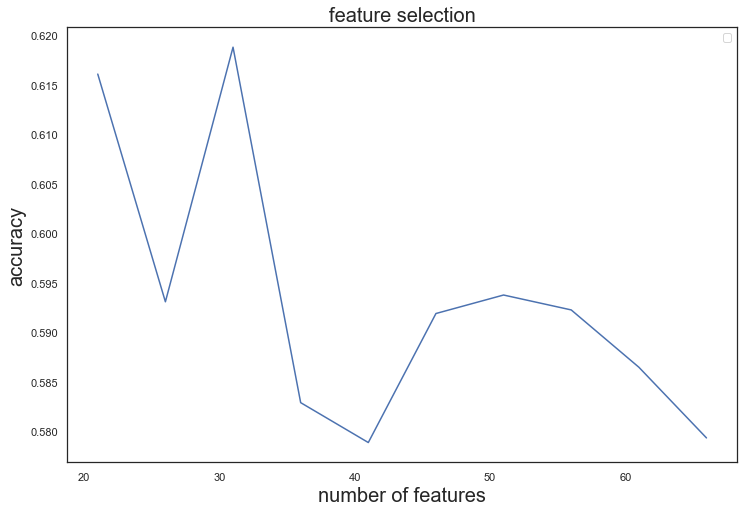

In [63]:
fea_num = []
scores = []
Xtrain1_ = Xtrain1.copy()
Xtest1_ = Xtest1.copy()
for i in range(len(important_features),20,-5):
    fea_num.append(i)
    Xtrain1_ = Xtrain1_[important_features[:i]]
    Xtest1_ = Xtest1_[important_features[:i]]
    rf = RandomForestRegressor()
    rf.fit(Xtrain1_, Ytrain)
    score = rf.score(Xtest1_,Ytest)
    scores.append(score)
plt.figure(figsize=(12,8))
plt.plot(fea_num,scores)
plt.xlabel('number of features',fontsize = 20)
plt.ylabel('accuracy',fontsize = 20)
plt.title('feature selection',fontsize = 20)
plt.legend()

No handles with labels found to put in legend.


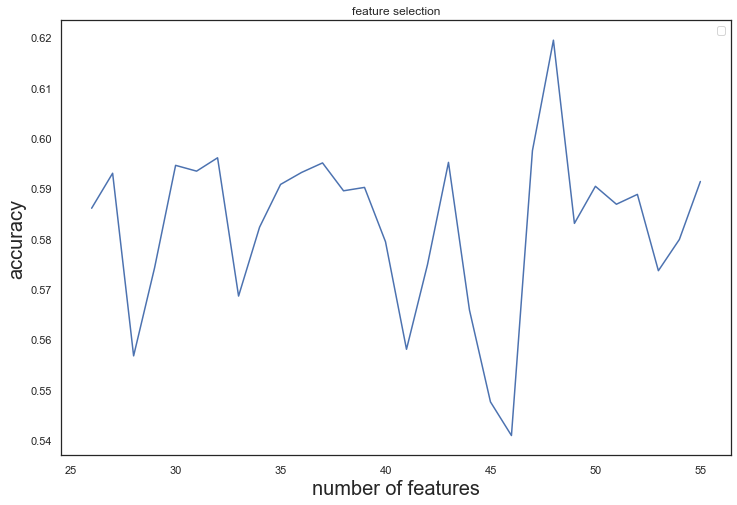

In [64]:
fea_num = []
scores = []
Xtrain1_ = Xtrain1.copy()
Xtest1_ = Xtest1.copy()
for i in range(55,25,-1):
    fea_num.append(i)
    Xtrain1_ = Xtrain1_[important_features[:i]]
    Xtest1_ = Xtest1_[important_features[:i]]
    rf = RandomForestRegressor()
    rf.fit(Xtrain1_, Ytrain)
    score = rf.score(Xtest1_,Ytest)
    scores.append(score)
plt.figure(figsize=(12,8))
plt.plot(fea_num,scores)
plt.xlabel('number of features',fontsize = 20)
plt.ylabel('accuracy',fontsize = 20)
plt.title('feature selection')
plt.legend()

The model works best when the number of features is 48

In [73]:
Xtrain[important_features[:48]].to_csv('Xtrain.csv')
Xtest.to_csv('Xtest.csv')
Ytrain.to_csv('Ytrain.csv')
Ytest.to_csv('Ytest.csv')